In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

In [68]:
data1 = pd.read_csv('OnlineNewsPopularity.csv')
#data.head()
pd.options.display.max_columns = None
data1.head()

,url,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.092562,0.045662,0.013699,0.378636,-0.350000,-0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.148948,0.043137,0.015686,0.286915,-0.118750,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.323333,0.056872,0.009479,0.495833,-0.466667,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.100705,0.041431,0.020716,0.385965,-0.369697,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.281003,0.074627,0.012127,0.411127,-0.220192,0.136364,505


In [70]:
data1.columns = data1.columns.str.lstrip()
data1.columns

Index(['url', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'avg_positive_polarity', 'avg_negative_polarity',
       'title_sentiment_polarity', 'shares'],
      dtype='object')

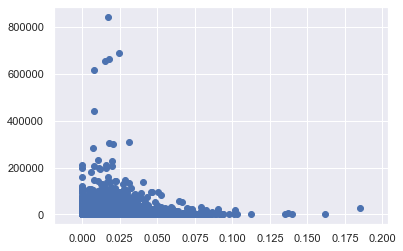

In [33]:
plt.scatter(data1['global_rate_negative_words'],data1['shares'])
#there is no linear relation between the both, if anything it is slightly exponential


data_channel_is_lifestyle :  2099
data_channel_is_entertainment :  7057
data_channel_is_bus :  6258
data_channel_is_socmed :  2323
data_channel_is_tech :  7346
data_channel_is_world :  8427


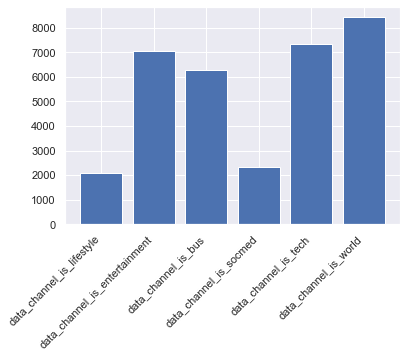

In [34]:
count = []
category_type = ['data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world']

for item in category_type:
    count.append(data1[item].sum())
    print (item, ": ", data1[item].sum())

plt.bar(category_type,height= count,orientation='vertical')
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')

plt.show()


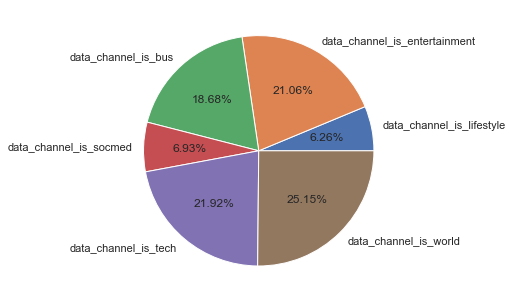

In [47]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

ax.pie(count, labels = category_type,autopct='%1.2f%%')
plt.show()

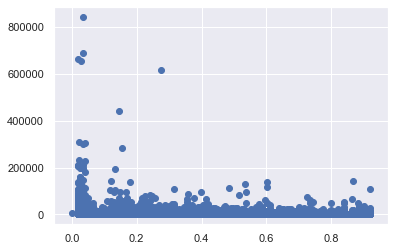

In [59]:
plt.scatter(data1['LDA_02'],data1['shares'])
#we see a small relationship between the both, though not really significant

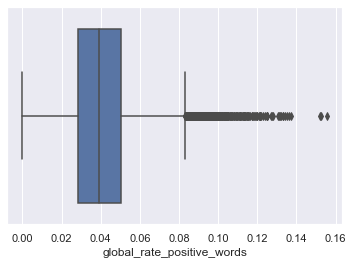

In [72]:
sns.boxplot(x=data1['global_rate_positive_words'])
#this tells us,global_rate_positive_words has alot of outliers 
#mainly after 0.082, there are huge values.


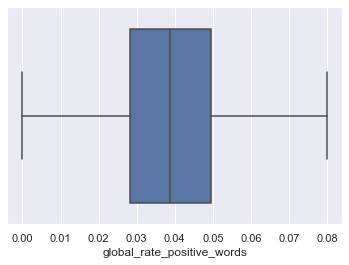

In [75]:
data2= data1.copy()
data2= data2[data2['global_rate_positive_words']<0.08]
sns.boxplot(x=data2['global_rate_positive_words'])
#we eliminate the outliers

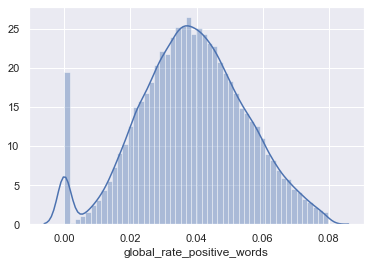

In [76]:
sns.distplot(data2['global_rate_positive_words'])
#normal distribution

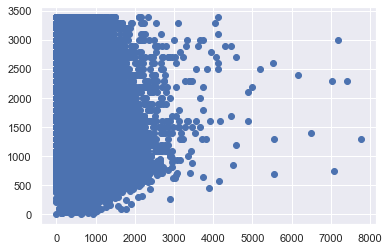

In [87]:
data1= data1[data1['shares']<3500]
plt.scatter(data1['n_tokens_content'], data1['shares'])
#this tells us that there are more shares where the token content is around or below 4000.
#as the token content increases, the number of shares decreases.

In [88]:
'''
What are the plots for plotting 2 continous variables?
They are mainly scatter plots. They indicate relationship between two variables.If one is dependant on the other.

What are continuos variables?
As the name suggests, they are continous in their interval.They take forever to count, they are infinite. 
eg- height,weight, speed, degrees

What are discrete variables?
Unlike continous, they are countable. Like no of apples,people.
'''

'\nWhat are the plots for plotting 2 continous variables?\nThey are mainly scatter plots. They indicate relationship between two variables.If one is dependant on the other.\n\nWhat are continuos variables?\nAs the name suggests, they are continous in their interval.They take forever to count, they are infinite. \neg- height,weight, speed, degrees\n\nWhat are discrete variables?\nUnlike continous, they are countable. Like no of apples,people.\n'